# Praktikum 1

## KMeans

KMeans adalah satu metode unsupervised learning pada machine learning. Metode ini menentukan jumlah cluster sesuai dengan jumlah kk yang dipilih. Proses KMeans secara manual, dapat dilihat pada tautan berikut,

https://docs.google.com/spreadsheets/d/16C2HxTFicQ5tS7aXc1Uvlu1kyvk20LSA_P-E2p47kLY/edit?gid=0#gid=0

Pada modul jobsheet ini, kita akan langsung mempraktikkan pembuatan model KMeans dengan menggunakan python. Untuk modul pertama ini, kita akan menggunakan contoh kasus yang sederhana, yaitu dengan menggunakan dataset iris. Sedangkan untuk modul kedua, kita akan melakukan clustering dengan lebih advance, yaitu reduksi warna dengan data gambar

Import dependensi termasuk pandas, numpy, matplotlib.pyplot, sklearn.cluster

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('iris.csv')

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Maka akan muncul tampilan seperti dibawah ini

Seleksi fitur (X) yang merupakan kolom SepalLengthCm sampai PetalWidthCm

In [ ]:
# Seleksi Fitur

X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

Menggunakan scatter plot untuk menampilkan cluster dari Sepal Length dan Sepal Width.

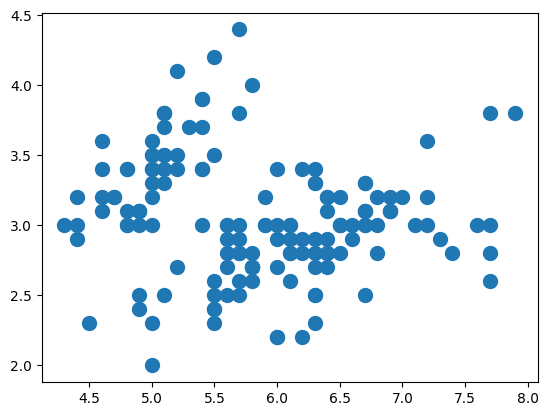

In [ ]:
# Plot Data
# Karena data 4 dimensi, maka akan kita coba
# plot cluster berdasarkan Sepal Length dan Sepal Width saja

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

Maka akan muncul tampilan seperti dibawah ini

Fitting data pada model KMeans dengan jumlah cluster 2

In [ ]:
# Buat Model KMeans
# Kali ini kita coba menggunakan k=2 - anggap saja kita tidak tahu jumlah label ada 3 :)

from sklearn.cluster import KMeans

# Inisiasi obyek KMeans
cl_kmeans = KMeans(n_clusters=2)

# Fit dan predict model
y_kmeans = cl_kmeans.fit_predict(X)

Menggunakan scatter plot hasil klaster (y_means).

plot centerroid pada setiap klaster.

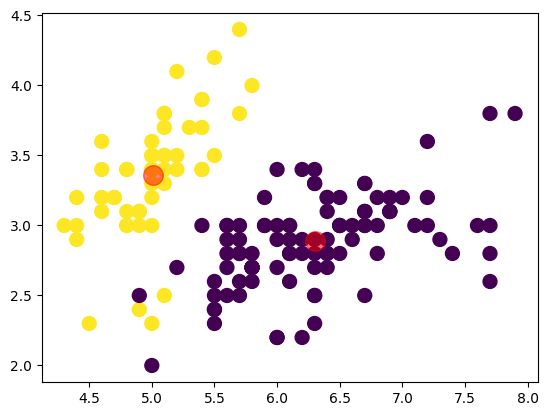

In [ ]:
# Plot hasi cluster berdasarkan Sepal Length dan Sepal Width
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

Print nilai sum of squares dari hasil klastering.

In [ ]:
# Cek Nilai SSE
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 152.36870647733915


Menggunakan model KMeans untuk mengimplementasikan metode Elbow dimana metode untuk menentukan jumlah cluster yang tepat.

Selanjutnya visualisasi hasil dilakukan menggunakan matplotlib, dari hasil sse dari setiap kmeanmodel pada setiap jumlah kluster.

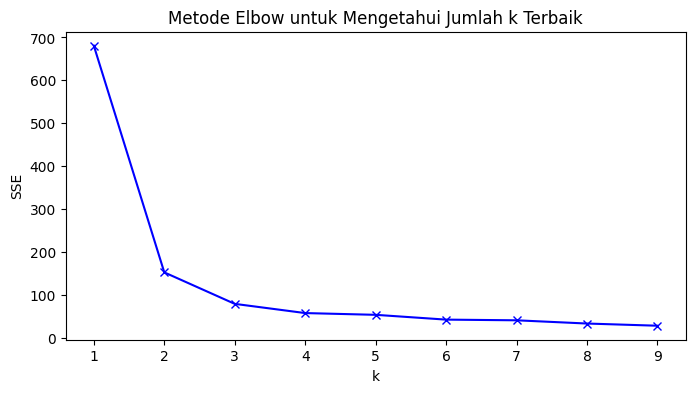

In [ ]:
# Implementasi Metode Elbow

# List nilai SSEhasil
sse = []

# Cari k terbaik dari 1-10
K = range(1,10)

# Cek nilai SSE setiap k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)


# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

print nilai SSE pada setiap k

In [ ]:
# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=680.8243999999996
k=2; SSE=152.36870647733915
k=3; SSE=78.94506582597728
k=4; SSE=57.4732732654949
k=5; SSE=53.38225204272864
k=6; SSE=42.19929596273295
k=7; SSE=40.609288888888884
k=8; SSE=33.07646618357489
k=9; SSE=27.982170084301675


# Praktikum 2

import library

Import dependensi termasuk matplotlib.pyplotm, seaborn, dan numpy.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

## Pengantar k-Means

Menampilkan scatter plot dari hasil generasi dummy data menggunakan sklearn.datasets.make_blobs dengan jumlah sample 300 dan center 4

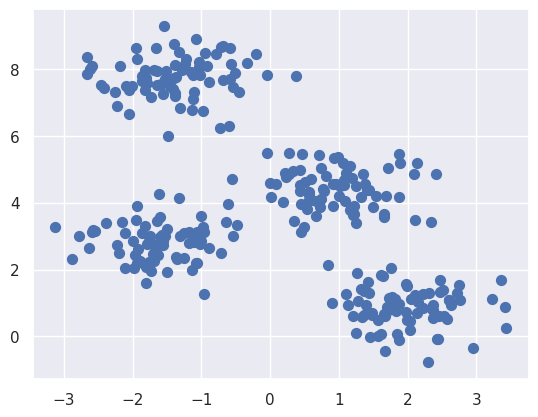

In [ ]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

Nanti akan muncul tampilan seperti di bawah ini:



Fitting data pada model KMeans, dengan 4 klaster, lalu menggunakan hasilnya untuk prediksi nilai X.

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

Menampilkan hasil prediksi KMeans model menggunakan scatter plot.

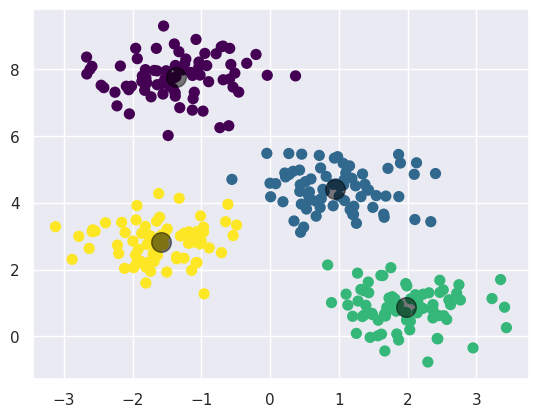

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

## Algoritma Expectation-Maximization

Implementasi dari algoritma expectation maximization (KMeans) menggunakan pairwise_diistances_argmin

dengan langkah sebagai berikut
1. Melakukan pemilihan klaster secara acak.

2. Input label berdasarkan center terdekat.

3. Cek konvergensi

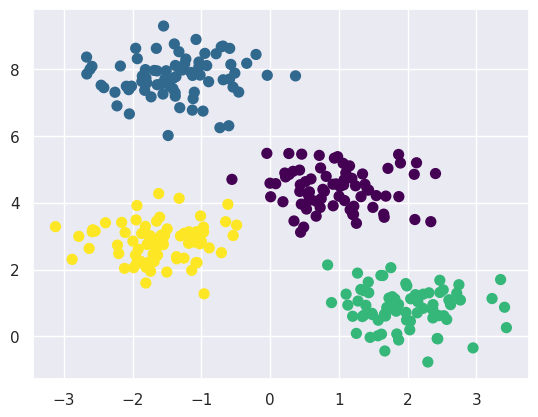

In [ ]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # 2a. input label center yang baru
        labels = pairwise_distances_argmin(X, centers)

        # 2b. update center dari titik baru
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])

        # 2c. cek konvergensi
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

Nanti akan muncul tampilan seperti di bawah ini:

### Perubahan random

menerapkan metode kmeans untuk clustering (menentukan centers dan labels)

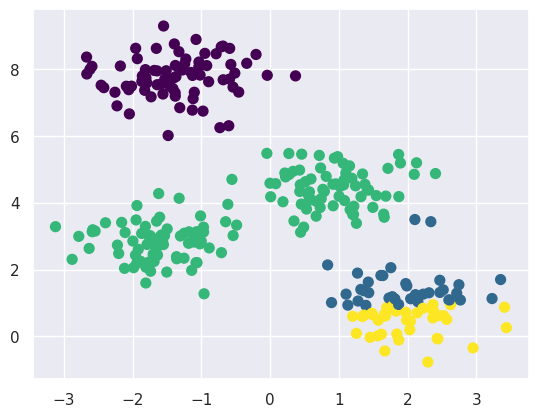

In [ ]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

Nanti akan muncul tampilan seperti di bawah ini:

### Optimalisasi Jumlah Klaster

Proses optimalisasi jumlah klaster menggunakan model KMeans

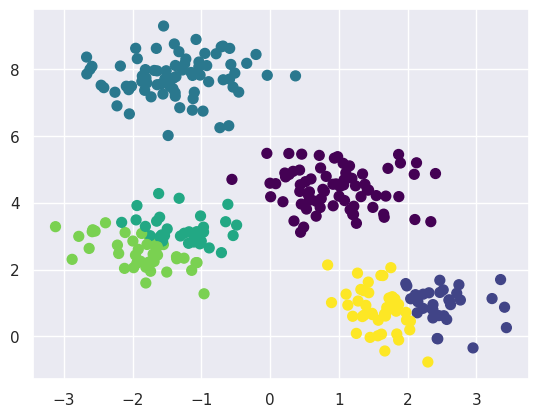

In [ ]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

Nanti akan muncul tampilan seperti di bawah ini:

### Batas Klaster yang Tidak Selalu Linier

Generasi nilai X, y menggunakan builtin dataset maker dari sklearn yaitu make_moons

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

Proses optimalisasi jumlah klaster menggunakan model KMeans

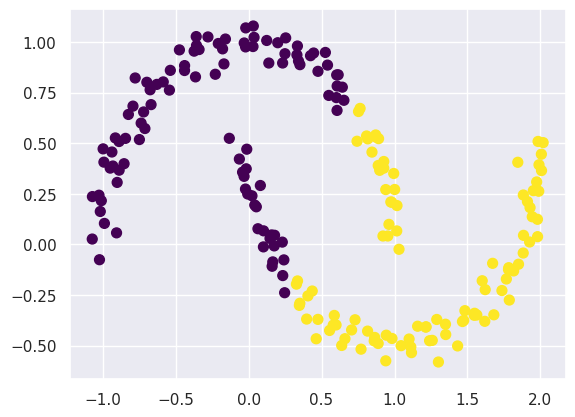

In [ ]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

Menggunakan SpectralClustering sebagai metode clustering pada data yang tidak terdistribusi secara normal.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


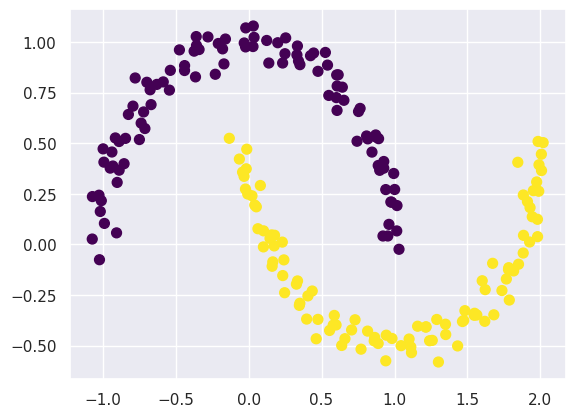

In [ ]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

## Contoh Kasus 1: Karakter Angka

Import method load_digists dari sklearn.datasets

Proses loading dataset pada variable digits

check bentuk data menggunakan digits.data.shape

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

fitting model kmeans untuk melakukan clustering data digit

In [ ]:
# terapkan K-Means
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

plotting hasil kmeans clustering menggunakan matplotlib

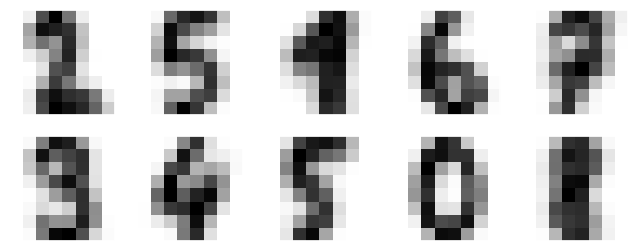

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

Proses labeling hasil cluster

In [ ]:
from scipy.stats import mode
import numpy as np

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]
    print(labels[mask])

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2]
[8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8]
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4

Evaluasi akurasi skor

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7440178074568725

plotting confusion matrix menggunakan heatmap dari hasil prediksi pada true value.

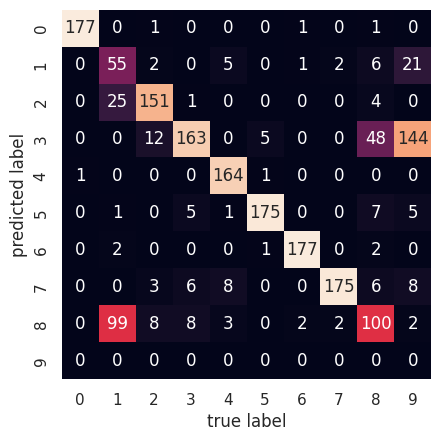

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

Fitting dan transform pada model TSNE untuk mengurangi dimensi pada data.

Fitting hasil TSNE pada model KMeans untuk menghitung klaster.

Permutasi label hasil sejumlah klaster.

Evaluasi akurasi skor hasil fitting.

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

print(digits.data.shape, digits_proj.shape, digits.target)

# hitung klaster
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# permutasi label
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# hitung akurasi
accuracy_score(digits.target, labels)

(1797, 64) (1797, 2) [0 1 2 ... 8 9 8]


0.9415692821368948

## Studi Kasus 2: Kompresi Citra

Load image flower.jpg menggunakan method looad_sample_image.

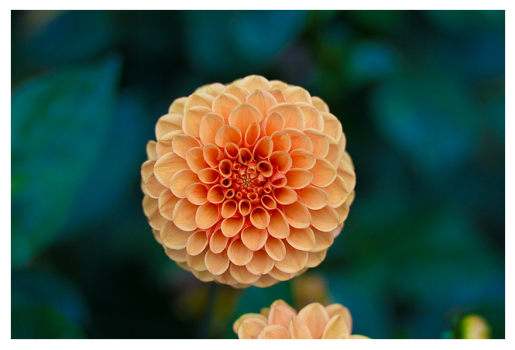

In [ ]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower);

Nanti akan muncul tampilan seperti di bawah ini:

cek bentuk data dari flower.jpg

In [ ]:
flower.shape

(427, 640, 3)

Membagi setiap pixel dari data flower dengan 255.

Merubah dimensi gambar menjadi 2D menggunakan method reshape.

check hasil reshape.

In [ ]:
data = flower / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

plot_pixels digunakan untuk plotting pixel sejumlah nilai N.
Proses seperti berikut.
1. Pick random subset dari data (X) sejumlah nilai N
2. ekstraksi nilai R,G,B
3. Plot distribusi pixel red dan green menggunakan scatter plot.
4. Plot distribusi pixel red dan blue menggunakan scatter plot.

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(100)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

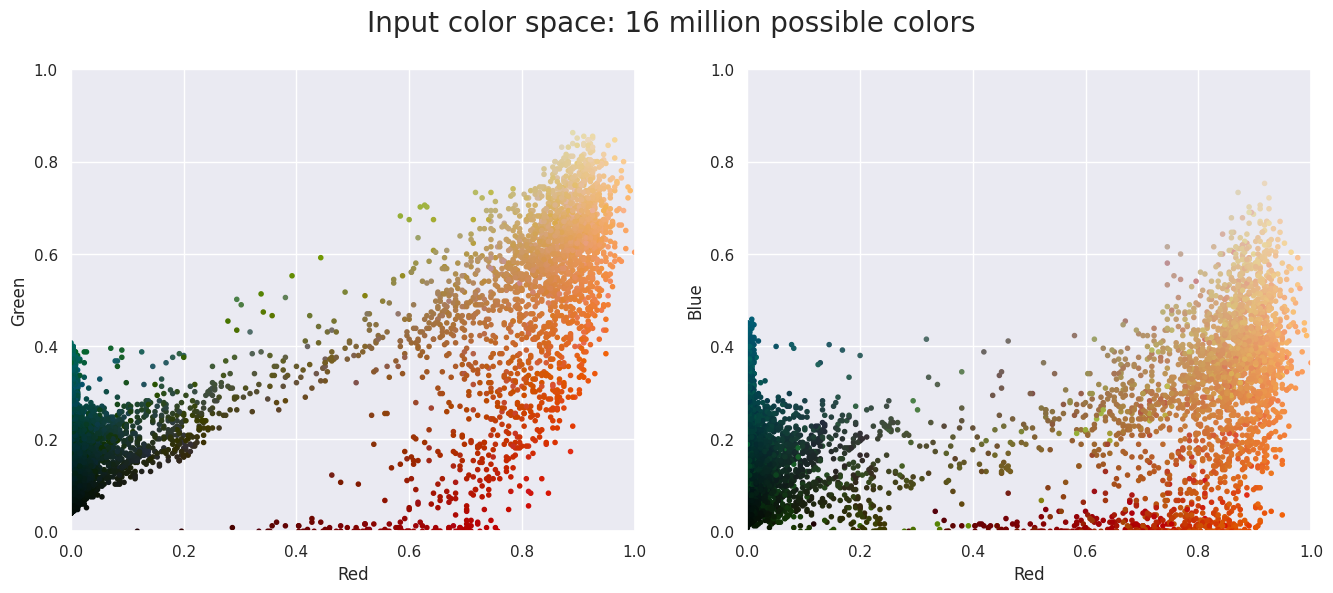

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

Reduksi jumlah color palette menggunakan model MiniBatchKMeans.

Plot hasil reduksi menggunakan plot_pixels yang sudah didefinisi sebelumnya.

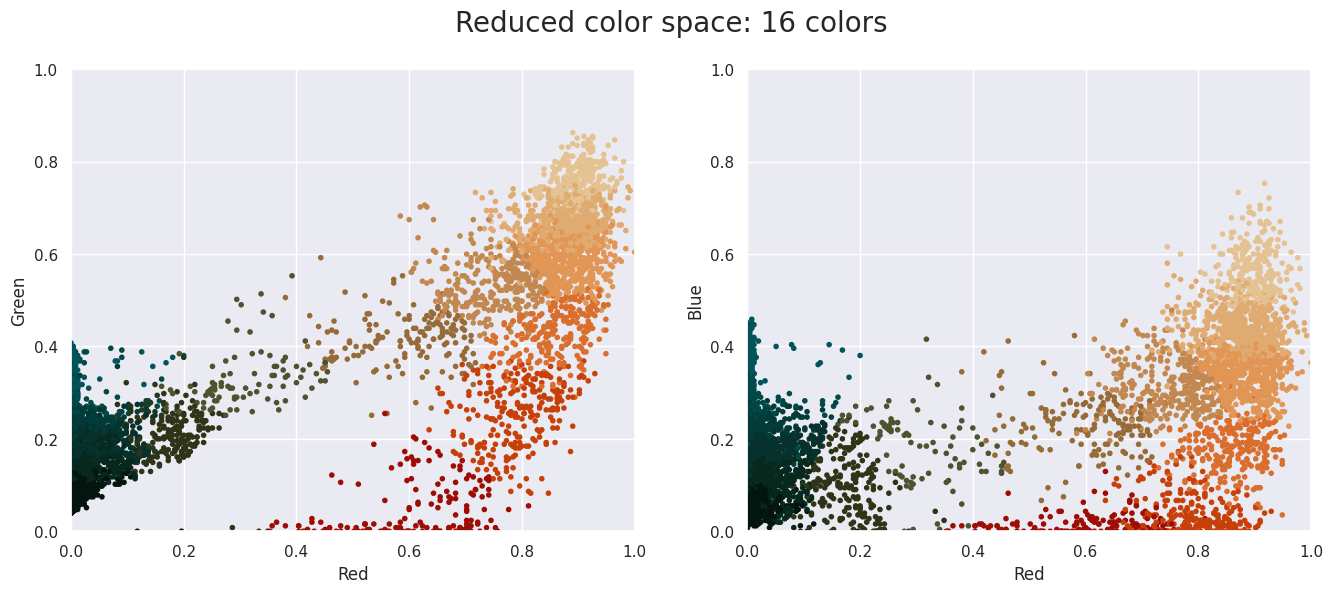

In [ ]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

Buat object baru yaitu flower_recolored menggunakan variable new_colors yang sudah direshape sesuai flower original.

Plot data flower original dan flower_recolored.

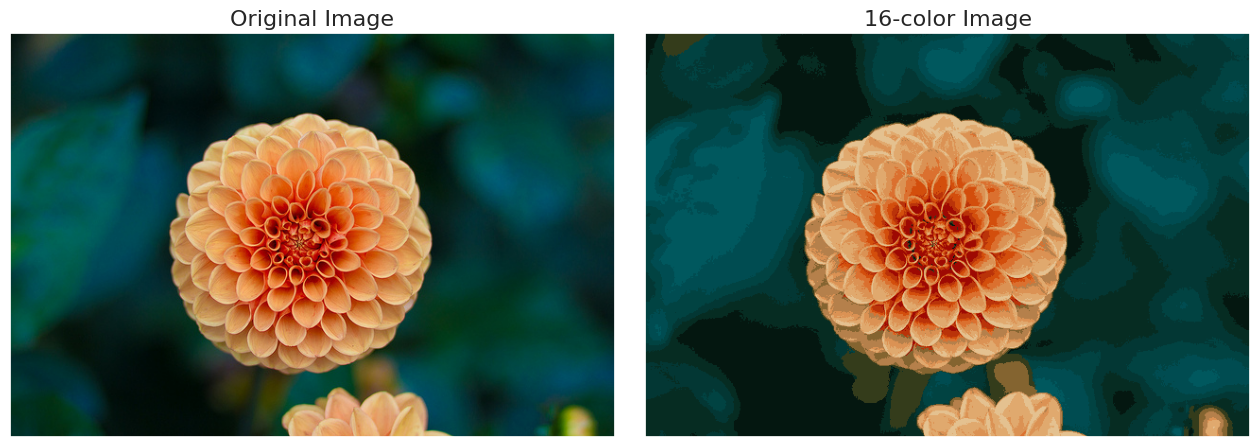

In [ ]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

# Praktikum 3

## Self-optimizing Map (SOM)

Download dataset terlebih dahulu

Contoh penerapan Self-Organizing Map (SOM) untuk klaterisasi menggunakan library SOMPY. Sebelum memulai, pastikan Anda telah menginstal library SOMPY. JIka dalam library tidak ditemukan SOMPY bisa menggunakan minisom. Dalam Praktikum ini akan menggunakan library MiniSom untuk implementasi SOM dengan ukuran yang lebih kecil.

instalasi SOM

Instal minisom

In [ ]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=ae03f6e4eace5e6f51279b32c01e1961a07d4050babd802b7113a60f462f452f
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


import minisom, numpy, matplotlib, sklearn.

In [ ]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

Gunakan dataset Iris sebagai contoh

laod data iris dari sklearn.

In [ ]:
# Load dataset
iris = datasets.load_iris()
data = iris.data

Normalisasi dataset agar nilainya berada dalam rentang yang seragam.

Normalisasi data dengan membagi data menggunakan value data.max(axis=0).

In [ ]:
# Normalisasi data
data = data / data.max(axis=0)

Menentukan ukuran peta, misalkan (10x10) dan inisialisasi SOM

Inisialisasi SOM dengan dimensi 10x10, 4 fitur, sigma 1/2 dan learning rate 1/2

In [ ]:
# Inisialisasi SOM
map_size = (10, 10)
som = MiniSom(map_size[0], map_size[1], data.shape[1], sigma=0.5, learning_rate=0.5)

Inisialisasi bobot SOM secara acak.

In [ ]:
# Inisialisasi bobot secara acak
som.random_weights_init(data)

Melatih SOM dengan data menggunakan metode train_random.

Menggunakan train_random dengan 100 kali iterasi.

In [ ]:
# Pelatihan SOM
num_epochs = 100
som.train_random(data, num_epochs)

Menggunakan peta hasil pelatihan untuk visualisasi. Dalam praktikum ini, akan menampilkan peta dengan warna dan menandai pemenang untuk setiap sampel.

Mencari neuron pemenang (best matching unit, BMU) untuk sampel x dalam SOM.

Menempatkan teks yang menunjukkan nomor sampel di posisi winner neuron pada map SOM. Dengan adjustment posisi teks dan juga font style.

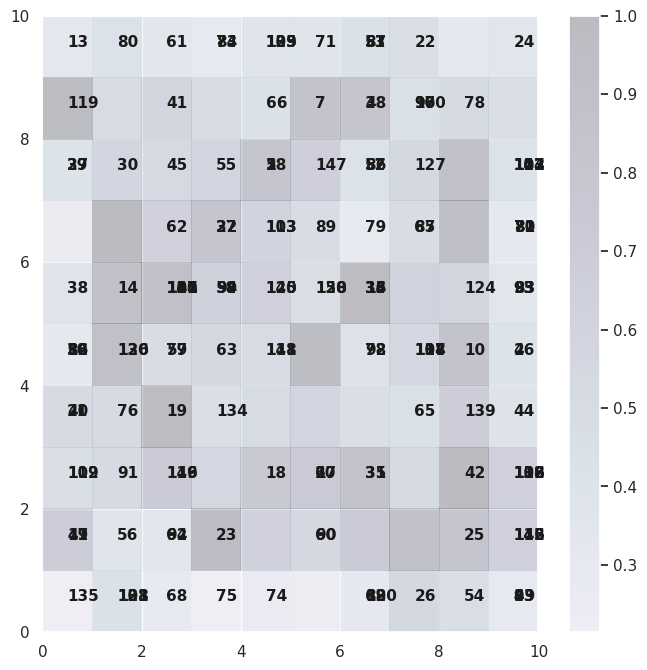

In [ ]:
# Visualisasi hasil SOM
plt.figure(figsize=(8, 8))
for i, x in enumerate(data):
    w = som.winner(x)  # Pemenang untuk sampel x
    plt.text(w[0]+.5, w[1]+.5, str(i+1), color='k', fontdict={'weight': 'bold', 'size': 11})
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

plt.show()

Nanti akan muncul tampilan seperti di bawah ini:

# Praktikum 4

Penerapan metode Self-Organizing Map (SOM) untuk segmentasi citra Lenna.

Download dataset terlebih dahulu

instalasi minisom

In [ ]:
!pip install minisom

Import dependensi: numpy, matplotlib.pyplot, skimage

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

Fungsi untuk inisialisasi bobot SOM, dengan dua paramter yaitu input_shape, dan output_shape

In [ ]:
# Fungsi untuk menginisialisasi bobot SOM
def initialize_weights(input_shape, output_shape):
    return np.random.rand(output_shape[0], output_shape[1], input_shape[2])

Fungsi kalkulasi jarak euclidean antara dua vektor input (input_vector) dan bobot SOM (weights) dengan memanfaatkan method np.linalg.norm

In [ ]:
# Fungsi untuk menghitung jarak antara vektor input dan bobot SOM
def calculate_distance(input_vector, weights):
    return np.linalg.norm(input_vector - weights, axis=2)

Fungsi untuk mencari winner unit menggunakan fungsi calculate_distance sebelumnya, memberikan return representasi dari winner unit menggunakan np.unravel_index

In [ ]:
# Fungsi untuk menemukan indeks unit pemenang (unit dengan bobot terdekat)
def find_winner_unit_in_image(input_vector, weights):
    distances = calculate_distance(input_vector, weights)
    return np.unravel_index(np.argmin(distances), distances.shape)

Fungsi ini bertujuan untuk memperbarui bobot dari Self-Organizing Map (SOM) berdasarkan vektor input, posisi winning vector, learning_rate setiap iterasi, dan radius ketetanggaan. Pembaruan bobot dilakukan dengan mempertimbangkan jarak antara neuron dan winning neuron, serta mengaplikasikan fungsi influence berdasarkan jarak tersebut.

In [ ]:
# Fungsi untuk memperbarui bobot SOM
def update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius):
    distances = np.linalg.norm(np.indices(weights.shape[:2]).T - np.array(winner).reshape(1, -1), axis=2)
    influence = np.exp(-distances / (2 * neighborhood_radius**2))
    weights += learning_rate * influence[:, :, np.newaxis] * (input_vector - weights)

Fungsi train_som digunakan untuk melatih Self-Organizing Map (SOM) dengan gambar input. Dalam fungsi ini, bobot SOM diinisialisasi, kemudian dilakukan pembaruan bobot untuk setiap piksel dalam gambar selama sejumlah epoch. learning rate dan radius ketetanggaan diperbarui secara eksponensial seiring dengan bertambahnya epoch, yang membantu dalam proses pembelajaran yang lebih halus dan stabil.

In [ ]:
# Fungsi untuk melatih SOM
def train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius):
    input_shape = image.shape
    som_shape = (10, 10, input_shape[2])  # Ukuran SOM sesuai dengan jumlah saluran warna
    weights = initialize_weights(input_shape, som_shape)

    for epoch in range(num_epochs):
        # Update parameter pembelajaran dan radius tetangga
        learning_rate = initial_learning_rate * np.exp(-epoch / num_epochs)
        neighborhood_radius = initial_neighborhood_radius * np.exp(-epoch / num_epochs)
        # Pemrosesan SOM
        for i in range(input_shape[0]):
            for j in range(input_shape[1]):
                input_vector = image[i, j, :]
                winner = find_winner_unit_in_image(input_vector, weights)
                update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius)

    return weights

Loading image lenna.png dan melakukan normalisasi intensitas piksel menjadi 0 dan 1 saja

In [ ]:
# Load citra Lenna (Anda bisa mengganti ini dengan citra lain jika diperlukan)
Lenna_path = "lenna.png"
Lenna = io.imread(Lenna_path) / 255.0  # Normalisasi intensitas piksel menjadi rentang [0, 1]

Proses training SOM weights menggunakan fungsi yang telah dibuat sebelumnya menggunakan citra Lenna, jumlah iterasi (epoch) 100, initial learning rate 0.1, dan initial neighborhood radius 5.

In [ ]:
# Latih SOM
num_epochs = 100
initial_learning_rate = 0.1
initial_neighborhood_radius = 5
trained_weights = train_som(Lenna, num_epochs, initial_learning_rate, initial_neighborhood_radius)

Menampilkan image hasil training SOM.

In [ ]:
# Visualisasi bobot SOM
plt.imshow(trained_weights)
plt.title('Trained SOM Weights for Lena')
plt.show()

# TUGAS

## 1. Gunakan data 'Mall_Customers.csv'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load dataset
data = pd.read_csv('Mall_Customers.csv')

## 2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)

In [ ]:
# Seleksi fitur
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 3. Buatlah model K-Means dengan mempertimbangkan jumlah kk yang terbaik.

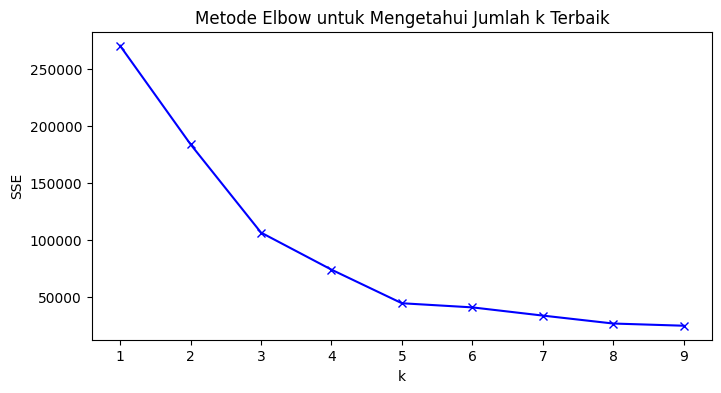

k=1; SSE=269981.28000000014
k=2; SSE=183653.3289473683
k=3; SSE=106348.37306211119
k=4; SSE=73880.64496247198
k=5; SSE=44448.45544793369
k=6; SSE=40825.16946386947
k=7; SSE=33642.57922077922
k=8; SSE=26686.837785187785
k=9; SSE=24766.471609793436


In [ ]:
# Optimalisasi jumlah klaster menggunakan metode elbow dan model KMeans

sse = []

# Cari k terbaik dari 1-10
K = range(1,10)

# Cek nilai SSE setiap k
for k in K:
 kmeans = KMeans(n_clusters=k, random_state=42)
 kmeans.fit(X)
 sse.append(kmeans.inertia_)


# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

Dari sini dapat diketahui nilai k terbaik adalah 3 atas dasar lekukan / elbow yang terlihat pada angka 3

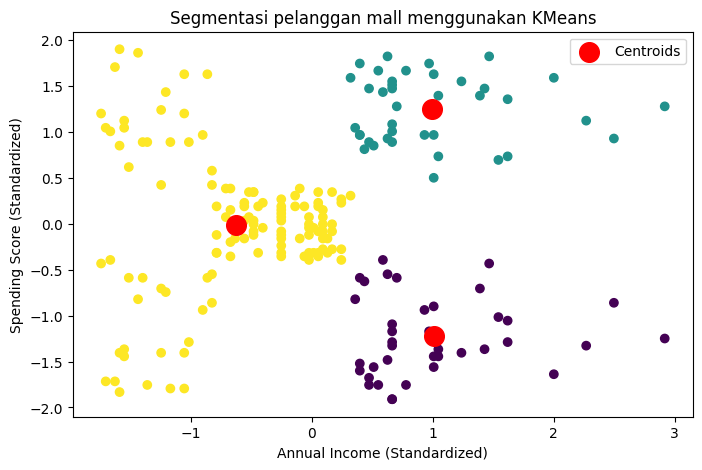

In [ ]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Step 7: Visualize the clusters
plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.xlabel('Annual Income (Standardized)')
plt.ylabel('Spending Score (Standardized)')
plt.title('Segmentasi pelanggan mall menggunakan KMeans')
plt.legend()
plt.show()

## 4. Buatlah implementasi model SOM untuk segmentasi citra lain

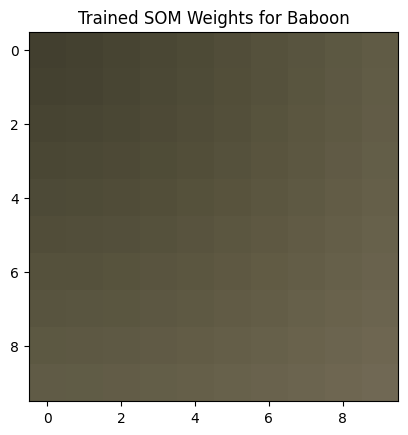

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

# Fungsi untuk menginisialisasi bobot SOM
def initialize_weights(input_shape, output_shape):
    return np.random.rand(output_shape[0], output_shape[1], input_shape[2])

# Fungsi untuk menghitung jarak antara vektor input dan bobot SOM
def calculate_distance(input_vector, weights):
    return np.linalg.norm(input_vector - weights, axis=2)

# Fungsi untuk menemukan indeks unit pemenang (unit dengan bobot terdekat)
def find_winner_unit_in_image(input_vector, weights):
    distances = calculate_distance(input_vector, weights)
    return np.unravel_index(np.argmin(distances), distances.shape)

# Fungsi untuk memperbarui bobot SOM
def update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius):
    distances = np.linalg.norm(np.indices(weights.shape[:2]).T - np.array(winner).reshape(1, -1), axis=2)
    influence = np.exp(-distances / (2 * neighborhood_radius**2))
    weights += learning_rate * influence[:, :, np.newaxis] * (input_vector - weights)

# Fungsi untuk melatih SOM
def train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius):
    input_shape = image.shape
    som_shape = (10, 10, input_shape[2])  # Ukuran SOM sesuai dengan jumlah saluran warna
    weights = initialize_weights(input_shape, som_shape)

    for epoch in range(num_epochs):
        # Update parameter pembelajaran dan radius tetangga
        learning_rate = initial_learning_rate * np.exp(-epoch / num_epochs)
        neighborhood_radius = initial_neighborhood_radius * np.exp(-epoch / num_epochs)
        # Pemrosesan SOM
        for i in range(input_shape[0]):
            for j in range(input_shape[1]):
                input_vector = image[i, j, :]
                winner = find_winner_unit_in_image(input_vector, weights)
                update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius)

    return weights

# Load citra Lenna (Anda bisa mengganti ini dengan citra lain jika diperlukan)
img_url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQETmW7uINmmZjNT6wTSdazQcGPDaKXfNIeHw&s"
img = io.imread(img_url) / 255.0  # Normalisasi intensitas piksel menjadi rentang [0, 1]

# Latih SOM
num_epochs = 100
initial_learning_rate = 0.1
initial_neighborhood_radius = 5
trained_weights = train_som(img, num_epochs, initial_learning_rate, initial_neighborhood_radius)

# Visualisasi bobot SOM
plt.imshow(trained_weights)
plt.title('Trained SOM Weights for Baboon')
plt.show()